In [1]:
#Brian Sunbury
#Machine Learing
#12:30
#October 19, 2017

import pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
%matplotlib inline

#how to get feature names from a data frame
#https://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers

data = pandas.read_csv('hr.csv')
#split categorical data into different attributes, making it numerical
dummie_data = pandas.get_dummies(data)

(train, test) = train_test_split(data, test_size=0.20)
(dummie_train, dummie_test) = train_test_split(dummie_data, test_size=0.20)

#data prep
# This includes (but may not be limited to) filling in any missing values, 
# transforming categorical data into numbers in a way that makes sense 
# (Hint: you might look into the Pandas replace, get_dummies, and join functions)

#no missing values in the dataset

In [2]:
#model experiments
# a k-NN variant, 
# a decision tree/forest variant, 
# a linear model, 
# and a support vector machine

# tune at least 2 important parameters for that algorithm in hopes of finding 
# the best model for that family and avoiding overfitting

#Regression is good for continuous values so I'm going to use 
#the classifier because left is discrete, yes or no

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

kNN = KNeighborsClassifier()
dt = DecisionTreeClassifier()
perc = Perceptron()
svm = SVC()

some_predictors = ['number_project','satisfaction_level','promotion_last_5years']

predictors = ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

some_dummie_predictors = ['number_project','average_montly_hours','promotion_last_5years']

dummie_predictors = ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'job_type_IT',
 'job_type_RandD',
 'job_type_accounting',
 'job_type_hr',
 'job_type_management',
 'job_type_marketing',
 'job_type_product_mng',
 'job_type_sales',
 'job_type_support',
 'job_type_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

kNN.fit(train[predictors], train['left'])
kNN_predictions = kNN.predict(test[predictors])
print("kNN prediction: {}".format(metrics.accuracy_score(test['left'], kNN_predictions)))
dt.fit(train[predictors], train['left'])
dt_predictions = dt.predict(test[predictors])
print("dt prediction: {}".format(metrics.accuracy_score(test['left'], dt_predictions)))
perc.fit(train[predictors], train['left'])
predictions = perc.predict(test[predictors])
print("Perc prediction: {}".format(metrics.accuracy_score(test['left'], predictions)))
svm.fit(train[predictors], train['left'])
svm_predictions = svm.predict(test[predictors])
print("svm prediction: {}".format(metrics.accuracy_score(test['left'], svm_predictions)))

print()

kNN.fit(dummie_train[dummie_predictors], dummie_train['left'])
dummie_kNN_predictions = kNN.predict(dummie_test[dummie_predictors])
print("kNN dummie prediction: {}".format(metrics.accuracy_score(dummie_test['left'], dummie_kNN_predictions)))
dt.fit(dummie_train[dummie_predictors], dummie_train['left'])
dt_dummie_predictions = kNN.predict(dummie_test[dummie_predictors])
print("dt dummie prediction: {}".format(metrics.accuracy_score(dummie_test['left'], dt_dummie_predictions)))
perc.fit(dummie_train[dummie_predictors], dummie_train['left'])
perc_dummie_predictions = kNN.predict(dummie_test[dummie_predictors])
print("Perc dummie prediction: {}".format(metrics.accuracy_score(dummie_test['left'], perc_dummie_predictions)))
svm.fit(dummie_train[dummie_predictors], dummie_train['left'])
svm_dummie_predictions = kNN.predict(dummie_test[dummie_predictors])
print("svm dummie prediction: {}".format(metrics.accuracy_score(dummie_test['left'], svm_dummie_predictions)))

kNN prediction: 0.95
dt prediction: 0.9786666666666667
Perc prediction: 0.24166666666666667
svm prediction: 0.955

kNN dummie prediction: 0.9333333333333333
dt dummie prediction: 0.9333333333333333
Perc dummie prediction: 0.9333333333333333
svm dummie prediction: 0.9333333333333333


k: 1	Minkowski distance: 0.96367	Manhattan distance: 0.96333
k: 3	Minkowski distance: 0.955	Manhattan distance: 0.95333
k: 5	Minkowski distance: 0.95	Manhattan distance: 0.94867
k: 9	Minkowski distance: 0.94967	Manhattan distance: 0.94967
k: 15	Minkowski distance: 0.94233	Manhattan distance: 0.94367
k: 21	Minkowski distance: 0.93967	Manhattan distance: 0.941
k: 31	Minkowski distance: 0.93367	Manhattan distance: 0.93767
k: 51	Minkowski distance: 0.927	Manhattan distance: 0.929
k: 100	Minkowski distance: 0.91233	Manhattan distance: 0.93367


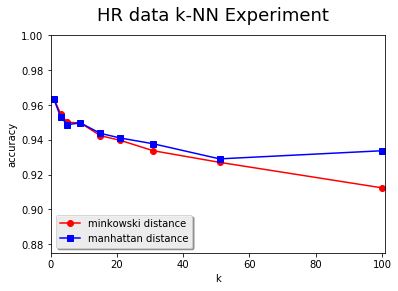

In [3]:
#fine tuning the kNN model by changing number of neighbors and distance formula
k_values = [1,3,5,9,15,21,31,51,100]
kNN_minkow_accuracies = []
kNN_manhat_accuracies = []

for k in k_values:
    kNN_minkow = KNeighborsClassifier(n_neighbors=k,p=2)
    
    kNN = KNeighborsClassifier(n_neighbors=5, )
    
    kNN_manhat = KNeighborsClassifier(n_neighbors=k,p=1)
    kNN_minkow.fit(train[predictors], train['left'])
    kNN_manhat.fit(train[predictors], train['left'])
    kNN_minkow_predictions = kNN_minkow.predict(test[predictors])
    kNN_manhat_predictions = kNN_manhat.predict(test[predictors])
    current_minkow_accuracy = metrics.accuracy_score(test['left'], kNN_minkow_predictions)
    current_manhat_accuracy = metrics.accuracy_score(test['left'], kNN_manhat_predictions)
    kNN_minkow_accuracies.append(current_minkow_accuracy)
    kNN_manhat_accuracies.append(current_manhat_accuracy)
    print("k: {}\tMinkowski distance: {}\tManhattan distance: {}"\
          .format(k, round(current_minkow_accuracy,5), round(current_manhat_accuracy,5)))

plt.suptitle('HR data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_values,kNN_minkow_accuracies,'ro-',label='minkowski distance')
plt.plot(k_values,kNN_manhat_accuracies,'bs-',label='manhattan distance')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,101,0.875,1])
plt.show()

depth: 1	Gini: 0.81567	Entropy: 0.81567
depth: 2	Gini: 0.84533	Entropy: 0.81467
depth: 5	Gini: 0.97467	Entropy: 0.972
depth: 7	Gini: 0.97833	Entropy: 0.97833
depth: 9	Gini: 0.98033	Entropy: 0.98
depth: 10	Gini: 0.98033	Entropy: 0.981
depth: 12	Gini: 0.97967	Entropy: 0.98033
depth: 15	Gini: 0.97967	Entropy: 0.98067
depth: 23	Gini: 0.97833	Entropy: 0.98167
depth: 51	Gini: 0.97733	Entropy: 0.98233
depth: 100	Gini: 0.97833	Entropy: 0.98267
depth: 200	Gini: 0.977	Entropy: 0.98233
depth: 500	Gini: 0.97833	Entropy: 0.982


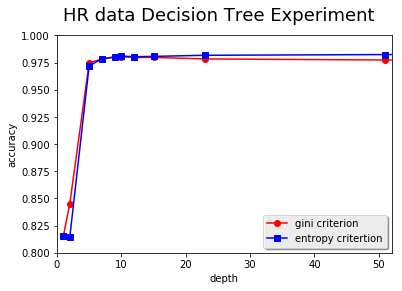

In [4]:
#fine tuning the dt model 
depth = [1,2,5,7,9,10,12,15,23,51,100,200,500]
dt_gini_accuracies = []
dt_entropy_accuracies = []

for c in depth:
    dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=c)
    dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=c)
    dt_gini.fit(train[predictors], train['left'])
    dt_entropy.fit(train[predictors], train['left'])
    dt_gini_predictions = dt_gini.predict(test[predictors])
    dt_entropy_predictions = dt_entropy.predict(test[predictors])
    current_gini_accuracy = metrics.accuracy_score(test['left'], dt_gini_predictions)
    current_entropy_accuracy = metrics.accuracy_score(test['left'], dt_entropy_predictions)
    dt_gini_accuracies.append(current_gini_accuracy)
    dt_entropy_accuracies.append(current_entropy_accuracy)
    print("depth: {}\tGini: {}\tEntropy: {}"\
          .format(c, round(current_gini_accuracy,5), round(current_entropy_accuracy,5)))

plt.suptitle('HR data Decision Tree Experiment',fontsize=18)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.plot(depth,dt_gini_accuracies,'ro-',label='gini criterion')
plt.plot(depth,dt_entropy_accuracies,'bs-',label='entropy critertion')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,52,0.8,1])
plt.show()

depth: 1	Gini: 0.825	Entropy: 0.825
depth: 2	Gini: 0.85367	Entropy: 0.82033
depth: 5	Gini: 0.973	Entropy: 0.975
depth: 7	Gini: 0.97833	Entropy: 0.97667
depth: 9	Gini: 0.98267	Entropy: 0.981
depth: 10	Gini: 0.981	Entropy: 0.98
depth: 12	Gini: 0.98133	Entropy: 0.97733
depth: 15	Gini: 0.98167	Entropy: 0.983
depth: 23	Gini: 0.981	Entropy: 0.983
depth: 51	Gini: 0.98233	Entropy: 0.98233
depth: 100	Gini: 0.98267	Entropy: 0.983
depth: 200	Gini: 0.98133	Entropy: 0.98367
depth: 500	Gini: 0.98133	Entropy: 0.98233


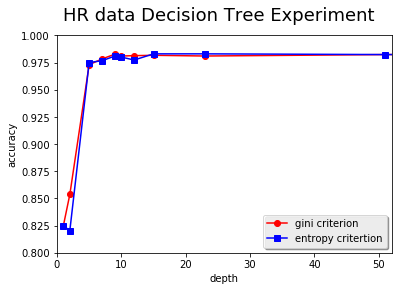

In [5]:
#fine tuning the dt model 
depth = [1,2,5,7,9,10,12,15,23,51,100,200,500]
dt_gini_accuracies = []
dt_entropy_accuracies = []

for c in depth:
    dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=c)
    dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=c)
    dt_gini.fit(dummie_train[dummie_predictors], dummie_train['left'])
    dt_entropy.fit(dummie_train[dummie_predictors], dummie_train['left'])
    dt_gini_predictions = dt_gini.predict(dummie_test[dummie_predictors])
    dt_entropy_predictions = dt_entropy.predict(dummie_test[dummie_predictors])
    current_gini_accuracy = metrics.accuracy_score(dummie_test['left'], dt_gini_predictions)
    current_entropy_accuracy = metrics.accuracy_score(dummie_test['left'], dt_entropy_predictions)
    dt_gini_accuracies.append(current_gini_accuracy)
    dt_entropy_accuracies.append(current_entropy_accuracy)
    print("depth: {}\tGini: {}\tEntropy: {}"\
          .format(c, round(current_gini_accuracy,5), round(current_entropy_accuracy,5)))

plt.suptitle('HR data Decision Tree Experiment',fontsize=18)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.plot(depth,dt_gini_accuracies,'ro-',label='gini criterion')
plt.plot(depth,dt_entropy_accuracies,'bs-',label='entropy critertion')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,52,0.8,1])
plt.show()

alpha: 0.0001	Accuracy: 0.762
alpha: 0.001	Accuracy: 0.762
alpha: 0.01	Accuracy: 0.762
alpha: 0.1	Accuracy: 0.762
alpha: 1.0	Accuracy: 0.762
alpha: 10	Accuracy: 0.762
alpha: 100	Accuracy: 0.762
alpha: 1000	Accuracy: 0.762


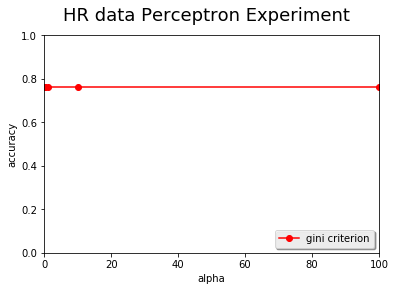

In [6]:
#fine tuning the perceptron model 
alpha = [0.0001,0.001,0.01,0.1,1.0,10,100,1000]
perc_accuracies = []

for a in alpha:
    perc = Perceptron(alpha=a)
    perc.fit(dummie_train[dummie_predictors], dummie_train['left'])
    perc_predictions = perc.predict(dummie_test[dummie_predictors])
    perc_accuracy = metrics.accuracy_score(dummie_test['left'], perc_predictions)
    perc_accuracies.append(perc_accuracy)
    print("alpha: {}\tAccuracy: {}"\
          .format(a, round(perc_accuracy,5)))

plt.suptitle('HR data Perceptron Experiment',fontsize=18)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(alpha,perc_accuracies,'ro-',label='gini criterion')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,100,0,1])
plt.show()

n_iter: 1	Accuracy: 0.762
n_iter: 10	Accuracy: 0.73833
n_iter: 100	Accuracy: 0.77933
n_iter: 1000	Accuracy: 0.45033
n_iter: 10000	Accuracy: 0.79867
n_iter: 15000	Accuracy: 0.74267


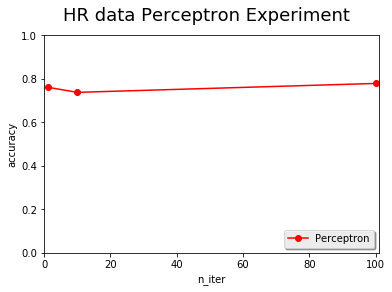

In [56]:
#fine tuning the perceptron model 
iter = [1,10,100,1000,10000,15000]
perc_accuracies = []

for i in iter:
    perc = Perceptron(n_iter=i)
    perc.fit(dummie_train[dummie_predictors], dummie_train['left'])
    perc_predictions = perc.predict(dummie_test[dummie_predictors])
    perc_accuracy = metrics.accuracy_score(dummie_test['left'], perc_predictions)
    perc_accuracies.append(perc_accuracy)
    print("n_iter: {}\tAccuracy: {}"\
          .format(i, round(perc_accuracy,5)))

plt.suptitle('HR data Perceptron Experiment',fontsize=18)
plt.xlabel('n_iter')
plt.ylabel('accuracy')
plt.plot(iter,perc_accuracies,'ro-',label='Perceptron')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,101,0,1])
plt.show()

n_iter: 5	Accuracy: 0.762
n_iter: 6	Accuracy: 0.238
n_iter: 7	Accuracy: 0.74333
n_iter: 8	Accuracy: 0.762
n_iter: 9	Accuracy: 0.759
n_iter: 10	Accuracy: 0.73833
n_iter: 11	Accuracy: 0.238
n_iter: 12	Accuracy: 0.238
n_iter: 13	Accuracy: 0.762
n_iter: 14	Accuracy: 0.762
n_iter: 15	Accuracy: 0.238
n_iter: 16	Accuracy: 0.762
n_iter: 17	Accuracy: 0.74067
n_iter: 18	Accuracy: 0.75967
n_iter: 19	Accuracy: 0.73


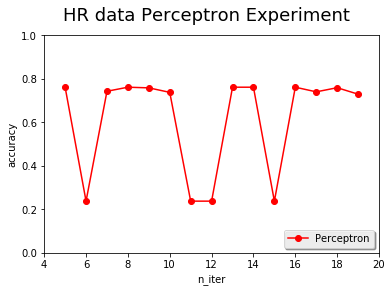

In [57]:
#fine tuning the perceptron model 
iter = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
perc_accuracies = []

for i in iter:
    perc = Perceptron(n_iter=i)
    perc.fit(dummie_train[dummie_predictors], dummie_train['left'])
    perc_predictions = perc.predict(dummie_test[dummie_predictors])
    perc_accuracy = metrics.accuracy_score(dummie_test['left'], perc_predictions)
    perc_accuracies.append(perc_accuracy)
    print("n_iter: {}\tAccuracy: {}"\
          .format(i, round(perc_accuracy,5)))

plt.suptitle('HR data Perceptron Experiment',fontsize=18)
plt.xlabel('n_iter')
plt.ylabel('accuracy')
plt.plot(iter,perc_accuracies,'ro-',label='Perceptron')
plt.legend(loc='lower right', shadow=True)
plt.axis([4,20,0,1])
plt.show()

n_iter: 5	Shuffled Accuracy: 0.762	Non-shuffled Accuracy: 0.74767
n_iter: 6	Shuffled Accuracy: 0.238	Non-shuffled Accuracy: 0.762
n_iter: 7	Shuffled Accuracy: 0.74333	Non-shuffled Accuracy: 0.72533
n_iter: 8	Shuffled Accuracy: 0.762	Non-shuffled Accuracy: 0.762
n_iter: 9	Shuffled Accuracy: 0.759	Non-shuffled Accuracy: 0.739
n_iter: 10	Shuffled Accuracy: 0.73833	Non-shuffled Accuracy: 0.736
n_iter: 11	Shuffled Accuracy: 0.238	Non-shuffled Accuracy: 0.762
n_iter: 12	Shuffled Accuracy: 0.238	Non-shuffled Accuracy: 0.75867
n_iter: 13	Shuffled Accuracy: 0.762	Non-shuffled Accuracy: 0.762
n_iter: 14	Shuffled Accuracy: 0.762	Non-shuffled Accuracy: 0.762
n_iter: 15	Shuffled Accuracy: 0.238	Non-shuffled Accuracy: 0.762
n_iter: 16	Shuffled Accuracy: 0.762	Non-shuffled Accuracy: 0.762
n_iter: 17	Shuffled Accuracy: 0.74067	Non-shuffled Accuracy: 0.762
n_iter: 18	Shuffled Accuracy: 0.75967	Non-shuffled Accuracy: 0.762
n_iter: 19	Shuffled Accuracy: 0.73	Non-shuffled Accuracy: 0.762


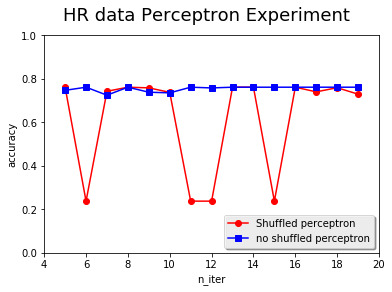

In [9]:
#fine tuning the perceptron model 
iter = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
perc_noshuff_accuracies = []
perc_shuffle_accuracies = []

for i in iter:
    shuffle_perc = Perceptron(n_iter=i,shuffle=True)
    noshuff_perc = Perceptron(n_iter=i,shuffle=False)
    shuffle_perc.fit(dummie_train[dummie_predictors], dummie_train['left'])
    noshuff_perc.fit(dummie_train[dummie_predictors], dummie_train['left'])
    shuffle_perc_predictions = shuffle_perc.predict(dummie_test[dummie_predictors])
    noshuff_perc_predictions = noshuff_perc.predict(dummie_test[dummie_predictors])
    shuffle_perc_accuracy = metrics.accuracy_score(dummie_test['left'], shuffle_perc_predictions)
    noshuff_perc_accuracy = metrics.accuracy_score(dummie_test['left'], noshuff_perc_predictions)
    perc_shuffle_accuracies.append(shuffle_perc_accuracy)
    perc_noshuff_accuracies.append(noshuff_perc_accuracy)
    print("n_iter: {}\tShuffled Accuracy: {}\tNon-shuffled Accuracy: {}"\
          .format(i, round(shuffle_perc_accuracy,5),round(noshuff_perc_accuracy,5)))

plt.suptitle('HR data Perceptron Experiment',fontsize=18)
plt.xlabel('n_iter')
plt.ylabel('accuracy')
plt.plot(iter,perc_shuffle_accuracies,'ro-',label='Shuffled perceptron')
plt.plot(iter,perc_noshuff_accuracies,'bs-',label='no shuffled perceptron')
plt.legend(loc='lower right', shadow=True)
plt.axis([4,20,0,1])
plt.show()

degree: 1	Accuracy: 0.948
degree: 2	Accuracy: 0.948
degree: 3	Accuracy: 0.948


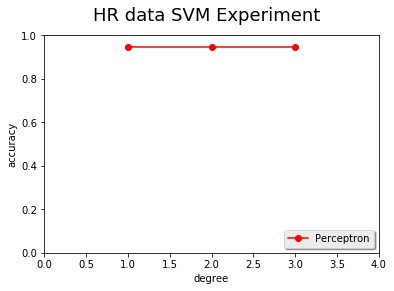

In [58]:
#fine tuning the perceptron model 
deg = [1,2,3]
svm_accuracies = []

for d in deg:
    svm = SVC(degree=d)
    svm.fit(dummie_train[dummie_predictors], dummie_train['left'])
    svm_predictions = svm.predict(dummie_test[dummie_predictors])
    svm_accuracy = metrics.accuracy_score(dummie_test['left'], svm_predictions)
    svm_accuracies.append(svm_accuracy)
    print("degree: {}\tAccuracy: {}"\
          .format(d, round(svm_accuracy,5)))

plt.suptitle('HR data SVM Experiment',fontsize=18)
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(deg,svm_accuracies,'ro-',label='Perceptron')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,4,0,1])
plt.show()

degree: 1	Accuracy: 0.955
degree: 2	Accuracy: 0.955
degree: 3	Accuracy: 0.955
degree: 5	Accuracy: 0.955


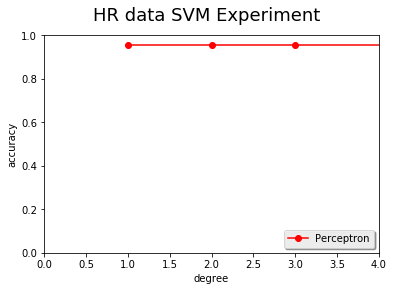

In [61]:
#fine tuning the perceptron model 
deg = [1,2,3,5]
svm_accuracies = []

for d in deg:
    svm = SVC(degree=d)
    svm.fit(train[predictors], train['left'])
    svm_predictions = svm.predict(test[predictors])
    svm_accuracy = metrics.accuracy_score(test['left'], svm_predictions)
    svm_accuracies.append(svm_accuracy)
    print("degree: {}\tAccuracy: {}"\
          .format(d, round(svm_accuracy,5)))

plt.suptitle('HR data SVM Experiment',fontsize=18)
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(deg,svm_accuracies,'ro-',label='Perceptron')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,4,0,1])
plt.show()

degree: 1	Accuracy: 0.96267
degree: 2	Accuracy: 0.961
degree: 4	Accuracy: 0.96467


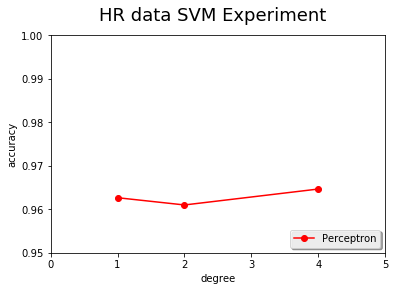

In [59]:
#fine tuning the perceptron model 
gam = [1,2,4]
svm_accuracies = []

for g in gam:
    svm = SVC(gamma=g)
    svm.fit(train[predictors], train['left'])
    svm_predictions = svm.predict(test[predictors])
    svm_accuracy = metrics.accuracy_score(test['left'], svm_predictions)
    svm_accuracies.append(svm_accuracy)
    print("degree: {}\tAccuracy: {}"\
          .format(g, round(svm_accuracy,5)))

plt.suptitle('HR data SVM Experiment',fontsize=18)
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.plot(gam,svm_accuracies,'ro-',label='Perceptron')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,5,0.95,1])
plt.show()

In [60]:
#import graphviz
#from sklearn import tree

#dt_ent = DecisionTreeClassifier(criterion='entropy',max_depth=10)
#dt_ent.fit(train[predictors], train['left'])

#classes = dt_ent.classes_

#tree.export_graphviz(dt_ent, out_file='tree.dot')

#treefile = open('tree.dot')
#tree_drawing = treefile.read()
#graphviz.Source(tree_drawing)

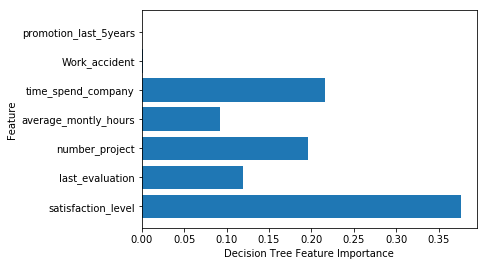

In [49]:
#visualize the feature importances

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

#plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,dt_ent.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Decision Tree Feature Importance")
plt.show()

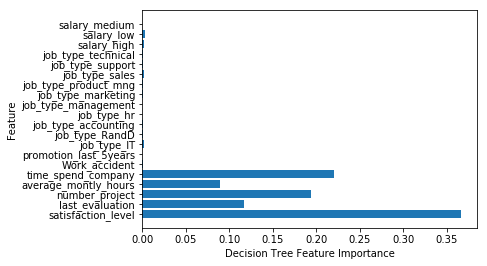

In [51]:
#visualize the feature importances

dt_ent = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt_ent.fit(dummie_train[dummie_predictors], dummie_train['left'])

index = range(len(dummie_predictors)) #creates a list of numbers the right size to use as the index

#plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,dt_ent.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,dummie_predictors) #put the feature names at the y tick marks
plt.xlabel("Decision Tree Feature Importance")
plt.show()